In [12]:
# Credits: https://stackoverflow.com/a/54058766
def overlay_transparent(background, overlay, x, y):

    background_width = background.shape[1]
    background_height = background.shape[0]

    if x >= background_width or y >= background_height:
        return background

    h, w = overlay.shape[0], overlay.shape[1]

    if x + w > background_width:
        w = background_width - x
        overlay = overlay[:, :w]

    if y + h > background_height:
        h = background_height - y
        overlay = overlay[:h]

    if overlay.shape[2] < 4:
        overlay = np.concatenate(
            [
                overlay,
                np.ones((overlay.shape[0], overlay.shape[1], 1), dtype = overlay.dtype) * 255
            ],
            axis = 2,
        )

    overlay_image = overlay[..., :3]
    mask = overlay[..., 3:] / 255.0

    background[y:y+h, x:x+w] = (1.0 - mask) * background[y:y+h, x:x+w] + mask * overlay_image

    return background

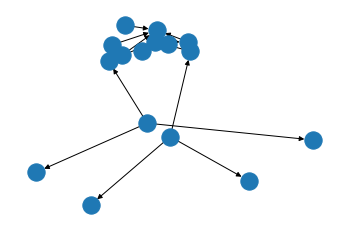

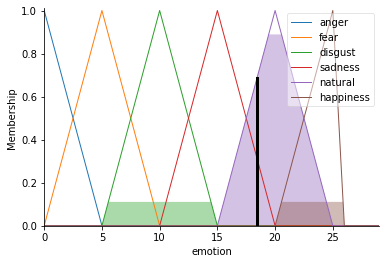

In [26]:
# Based on:
# https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_tipping_problem_newapi.html
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# New Antecedent/Consequent objects hold universe variables and membership
# functions
smile = ctrl.Antecedent(np.arange(0, 1, 0.1), 'smile')
eyebrows = ctrl.Antecedent(np.arange(0, 1, 0.1), 'eyebrows')
mouth = ctrl.Antecedent(np.arange(0, 1, 0.1), 'mouth')
emotion = ctrl.Consequent(np.arange(0, 30, 1), 'emotion')

# Auto-membership function population is possible with .automf(3, 5, or 7)
smile.automf(3)
eyebrows.automf(3)
mouth.automf(3)

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
emotion['anger'] = fuzz.trimf(emotion.universe, [0, 0, 5])
emotion['fear'] = fuzz.trimf(emotion.universe, [0, 5, 10])
emotion['disgust'] = fuzz.trimf(emotion.universe, [5, 10, 15])
emotion['sadness'] = fuzz.trimf(emotion.universe, [10, 15, 20])
emotion['natural'] = fuzz.trimf(emotion.universe, [15, 20, 25])
emotion['happiness'] = fuzz.trimf(emotion.universe, [20, 25, 25])

# You can see how these look with .view()
#smile['average'].view()
#eyebrows['average'].view()
#mouth['average'].view()
#emotion['normal'].view()

rule1 = ctrl.Rule(eyebrows['poor'] & mouth['poor'], emotion['anger'])
rule2 = ctrl.Rule(eyebrows['poor'] & mouth['good'], emotion['fear'])
rule3 = ctrl.Rule(mouth['good'], emotion['disgust'])
rule4 = ctrl.Rule(eyebrows['poor'] & smile['poor'], emotion['sadness'])
rule5 = ctrl.Rule(eyebrows['average'] & smile['average'] & mouth['average'], emotion['natural'])
rule6 = ctrl.Rule(smile['good'], emotion['happiness'])

rule1.view()

expression_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])

expression = ctrl.ControlSystemSimulation(expression_ctrl)

# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
expression.input['eyebrows'] = 0.5
expression.input['mouth'] = 0.5
expression.input['smile'] = 0.5

# Crunch the numbers
expression.compute()

#print(expression.output['emotion'])
emotion.view(sim=expression)

In [27]:
# Based on:
# https://www.geeksforgeeks.org/python-smile-detection-using-opencv/
import cv2

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
smile_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_smile.xml")

#happy_mask = cv2.imread("testMask.png",  cv2.IMREAD_UNCHANGED)

import cv2
import numpy as np

def detect(gray, frame):
    smile = False

    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        #cv2.rectangle(frame, (x, y), ((x + w), (y + h)), (255, 0, 0), 2) #rysuje prostokąt na obrazie oryginalnym - zaznaczenie twarzy
        #cv2.rectangle(gray, (x, y), ((x + w), (y + h)), (255, 0, 0), 2) #rysuje prostokąt na obrazie szarym - zaznaczenie twarzy
        roi_gray = gray[y:y + h, x:x + w]# położenie twarzy na szarym
        roi_color = frame[y:y + h, x:x + w]# położenie twarzy na oryginalnym
        smiles = smile_cascade.detectMultiScale(roi_gray, 1.8, 20)

        for (sx, sy, sw, sh) in smiles:
            
            #cv2.rectangle(roi_color, (sx, sy), ((sx + sw), (sy + sh)), (0, 0, 255), 2)#-||- zaznaczenie uśmiechu
            #cv2.rectangle(roi_gray, (sx, sy), ((sx + sw), (sy + sh)), (0, 0, 255), 2)#-||- szarym zaznaczenie uśmiechu
            #happy_mask_r = cv2.resize(happy_mask, (w, h))
            #frame = overlay_transparent(frame, happy_mask_r, x, y)
        
            smile = True
            
    #return frame, gray
    return smile

TRC:  8.54223036862


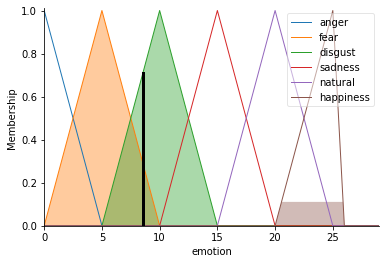

In [29]:
# Face landmarks lib
import dlib

# Screen capturing libs and defs
from mss import mss
from PIL import Image

sct = mss()
mon = {'top': 450, 'left': 720, 'width': 350, 'height': 350}

# Face detector
detector = dlib.get_frontal_face_detector()

# Landmark identifier. Set the filename to whatever you named the downloaded file
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

#img = cv2.imread('tim_roth_images/7173390615_foto-v-pol-lica.jpg')

# Main frame ~ excluded by screen capturing
#frame = np.array(img)
    
# To capture image in monochrome
#gray = cv2.cvtColor(img, cv2.COLOR_RGBA2GRAY)

#clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
#clahe_image = clahe.apply(gray)

#Detect the faces in the image
#detections = detector(clahe_image, 1)

# 1-16 jaw
# 17-21 left eyebrow
leftPartOfLeftEyebrow = 17
rightPartOfLeftEyebrow = 21

# 22-26 right eyebrow
leftPartOfRightEyebrow = 26
rightPartOfRightEyebrow = 22

# 27-35 nose
# 36-41 left eye
# 42-47 right eye

# 48-68 mouth
# upperUpLip 50-52
upperUpLip = 51

# upperDownLip 61-63
upperDownLip = 62
            
# lowerLowLip 56-58
lowerLowLip = 57

# lowerUpLip 65-68
lowerUpLip = 66

# mouth corners
leftMouthCorner = 48
rightMouthCorner = 54

maxMarksRange = 68

# cv2 putText Settings
font = cv2.FONT_HERSHEY_SIMPLEX
fontScale = 0.7
fontColor = (255,255,0)
lineType = 2

smile = False;

while 1:
    sct.get_pixels(mon)
    img = Image.frombytes('RGB', (sct.width, sct.height), sct.image)
    
    frame = np.array(img)
    
    # To capture image in monochrome
    gray = cv2.cvtColor(frame, cv2.COLOR_RGBA2GRAY)
    
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    clahe_image = clahe.apply(gray)

    #Detect the faces in the image
    detections = detector(clahe_image, 1)
    
    smile = detect(gray, frame)
    
    # Main loop for each detected face
    for k,d in enumerate(detections):

        xlist = []
        ylist = []

        #print("Face ",k)
        #print("Position: ", d)

        #Get coordinates
        shape = predictor(clahe_image, d)

        #print("Coordinates: ")
        for i in range(leftPartOfLeftEyebrow, leftPartOfRightEyebrow + 1):

            # First set to identify center of gravity
            xlist.append(float(shape.part(i).x))
            ylist.append(float(shape.part(i).y))

            # Eyebrows marks
            cv2.circle(frame, (shape.part(i).x, shape.part(i).y), 1, (0,0,255), thickness=2)
            #print("[", i, "]: ", shape.part(i).x, shape.part(i).y)

        # Eyebrows down
        if shape.part(leftPartOfLeftEyebrow).y < shape.part(rightPartOfLeftEyebrow).y or shape.part(leftPartOfRightEyebrow).y < shape.part(rightPartOfRightEyebrow).y:
            cv2.putText(frame,'opuszczone brwi', (shape.part(rightPartOfLeftEyebrow).x, shape.part(rightPartOfLeftEyebrow).y),
                        font, fontScale, fontColor, lineType)

            expression.input['eyebrows'] = 0
        else:
            expression.input['eyebrows'] = 0.5

        # Mouth drawings
        for i in range(leftMouthCorner, maxMarksRange):
            cv2.circle(frame, (shape.part(i).x, shape.part(i).y), 1, (0,0,255), thickness=2)

            # Second set to identify center of gravity
            xlist.append(float(shape.part(i).x))
            ylist.append(float(shape.part(i).y))

        # Calls the haarcascade's detect() function
        if(smile):
                cv2.putText(frame,'usmiech', (shape.part(lowerUpLip).x, shape.part(lowerUpLip).y), font, fontScale, fontColor, lineType)
                expression.input['smile'] = 1
                expression.input['mouth'] = 0.5
        
        else:
            expression.input['smile'] = 0.5

            # Mouth specs
            # Pursed lips
            if not (shape.part(lowerLowLip).y - shape.part(lowerUpLip).y)/2 < shape.part(lowerUpLip).y - shape.part(upperUpLip).y:
                cv2.putText(frame,'zacisniete usta', (shape.part(lowerUpLip).x, shape.part(lowerUpLip).y), font, fontScale, fontColor, lineType)
                expression.input['mouth'] = 0
            else:
                # Open mouth
                medUpperLipY = (shape.part(upperDownLip).y + shape.part(upperUpLip).y)/2
                if shape.part(rightMouthCorner).y > medUpperLipY and shape.part(leftMouthCorner).y > medUpperLipY:
                    cv2.putText(frame,'otwarte usta', (shape.part(lowerUpLip).x, shape.part(lowerUpLip).y), font, fontScale, fontColor, lineType)
                    expression.input['mouth'] = 1
                else:
                    expression.input['mouth'] = 0.5

        # Lips marks
        cv2.circle(frame, (shape.part(lowerUpLip).x, shape.part(lowerUpLip).y), 1, (0,0,255), thickness=2)
        cv2.circle(frame, (shape.part(lowerLowLip).x, shape.part(lowerLowLip).y), 1, (0,0,255), thickness=2)
        cv2.circle(frame, (shape.part(upperUpLip).x, shape.part(upperUpLip).y), 1, (0,255,255), thickness=2)
        cv2.circle(frame, (shape.part(upperDownLip).x, shape.part(upperDownLip).y), 1, (0,255,255), thickness=2)

        # Lips corners marks
        cv2.circle(frame, (shape.part(leftMouthCorner).x, shape.part(leftMouthCorner).y), 1, (255,255,255), thickness=2)
        cv2.circle(frame, (shape.part(rightMouthCorner).x, shape.part(rightMouthCorner).y), 1, (255,255,255), thickness=2)

        # Find both coordinates of centre of gravity
        xmean = np.mean(xlist) 
        ymean = np.mean(ylist)

        # Draw lines between marks and center of gravity
        #for i in range(leftPartOfLeftEyebrow, maxMarksRange):
            #cv2.line(frame, (shape.part(i).x, shape.part(i).y), (int(xmean), int(ymean)), (0,255,0), 1)

        # Draw center of gravity
        cv2.circle(frame, (int(xmean), int(ymean)), 1, (255,0,0), thickness=2)

        # Crunch the numbers to fuzzy system
        expression.compute()

    # Display the frame
    cv2.imshow("image", frame)

    # Exit program when the user presses 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        
        # Show plot for specific emotion and print unique value
        print("TRC: ", expression.output['emotion'])
        emotion.view(sim=expression)
        
        cv2.destroyAllWindows()
        break